# Importing modules

In [1]:
import PIL
from PIL import Image
# import requests
from io import BytesIO
import webcolors
import pandas as pd
import cv2
import pytesseract

In [5]:
image = cv2.imread('../data/Creative Assets_/adunit-winamax-vandals-du-ble-mpu-78cd6fb7ab77e365190d.png')

In [7]:
def get_texts_written_on_the_image(image_name):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                    cv2.CHAIN_APPROX_NONE)
    im2 = image.copy()
    string_array = []
    for cnt in contours:
        # print("once")
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Drawing a rectangle on copied image
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Cropping the text block for giving input to OCR
        cropped = im2[y:y + h, x:x + w]
        text = pytesseract.image_to_string(cropped)
        string_array.append(text)
    clean_array = []
    for s in string_array:
        clean_array.append(str(s).replace("\n" , " ").replace("\x0c", "").replace("  " , " ").strip())
    return clean_array
    

array([[[214, 214, 214],
        [214, 214, 214],
        [213, 213, 213],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[214, 214, 214],
        [214, 214, 214],
        [213, 213, 213],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]

In [ ]:
def get_dominant_colors(image_location):
    img = Image.open(image_location)

    def closest_colour(requested_colour):
        min_colours = {}
        for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(key)
            rd = (r_c - requested_colour[0]) ** 2
            gd = (g_c - requested_colour[1]) ** 2
            bd = (b_c - requested_colour[2]) ** 2
            min_colours[(rd + gd + bd)] = requested_colour
        return min_colours[min(min_colours.keys())]

    def top_colors(image, n):
        # convert the image to rgb
        image = image.convert('RGB')
        
        # resize the image to 300 x 300
        image = image.resize((300,300))
        
        detected_colors =[]
        for x in range(image.width):
            for y in range(image.height):
                detected_colors.append(closest_colour(image.getpixel((x,y))))
        Series_Colors = pd.Series(detected_colors)
        output=Series_Colors.value_counts()/len(Series_Colors)
        return(output.head(n))
    top_colors(img,10)
    

In [8]:
string_array = []
for cnt in contours:
    # print("once")
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
    text = pytesseract.image_to_string(cropped)
    string_array.append(text)
    # print(text)
print(string_array)
clean_array = []
for s in string_array:
    clean_array.append(str(s).replace("\n" , " ").replace("\x0c", "").replace("  " , " ").strip())
print(clean_array)
print(len(contours))


['\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', '\x0c', ' \n\n \n\n1 AP poe\nVINAMEXM GROS GAIN\n\n| ES\n\n \n\n \n\x0c', '\x0c', ' \n\n \n\nUES\n\nGROS GAIN\n\naE\n\nJOUER COMPORTE DES RISQUES : ENDETTEMENT, DEPENDANCE... APPELEZ LE 09 74 75 13 13 (APPEL NON SURTAXE).\n\n  \n\n \n\n \n\x0c']
['', '', '', '', '', '', '', '', '', '', '', '1 AP poe VINAMEXM GROS GAIN | ES', '', 'UES GROS GAIN aE JOUER COMPORTE DES RISQUES : ENDETTEMENT, DEPENDANCE... APPELEZ LE 09 74 75 13 13 (APPEL NON SURTAXE).']
14


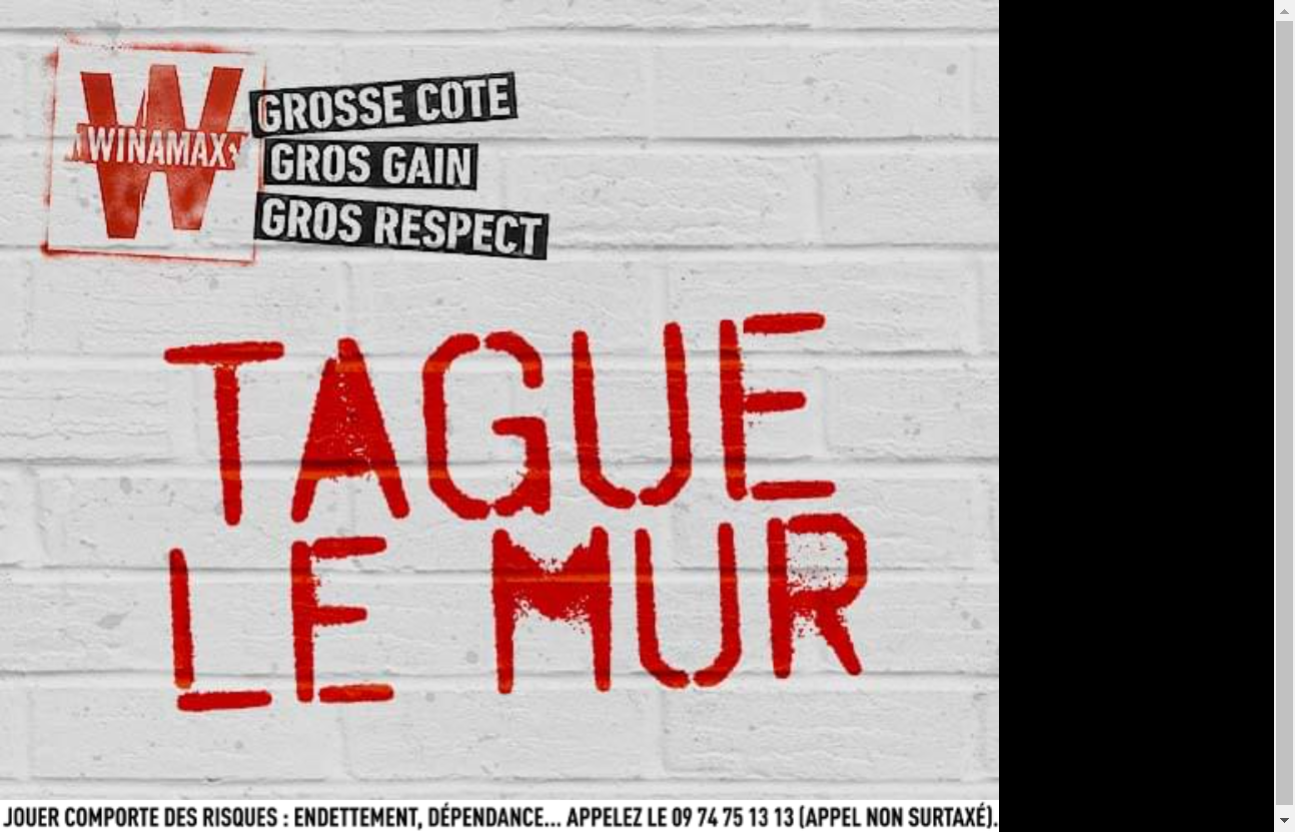

In [9]:
img = Image.open('../data/Creative Assets_/adunit-winamax-vandals-du-ble-mpu-78cd6fb7ab77e365190d.png')
img

In [10]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = requested_colour
    return min_colours[min(min_colours.keys())]

In [11]:
def top_colos(image, n):
    # convert the image to rgb
    image = image.convert('RGB')
     
    # resize the image to 300 x 300
    # image = image.resize((300,300))
     
    detected_colors =[]
    for x in range(image.width):
        for y in range(image.height):
            detected_colors.append(closest_colour(image.getpixel((x,y))))
    Series_Colors = pd.Series(detected_colors)
    output=Series_Colors.value_counts()/len(Series_Colors)
    return(output.head(n))
 
 
top_colos(img,10)

(0, 0, 0)          0.212384
(214, 214, 214)    0.045245
(213, 213, 213)    0.043082
(215, 215, 215)    0.041508
(212, 212, 212)    0.037733
(216, 216, 216)    0.033929
(211, 211, 211)    0.029975
(217, 217, 217)    0.025997
(210, 210, 210)    0.023716
(218, 218, 218)    0.019075
dtype: float64